# $B+ -> \Lambda \bar{p} K+ K+$

In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import vector  ## added by mds
import awkward as ak
import iminuit
from iminuit import Minuit
from fit_classes import *
from utils import *
import mplhep as hep

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Use LHCb style for plots
#import mplhep as hep
#plt.style.use(hep.style.CMS)
#plt.rcParams["figure.figsize"] = (8,6)
#plt.rcParams['font.family'] = 'DejaVu Sans' # Change 'DejaVu Sans' to a font installed on your system


Run the following regardless of data choice

In [4]:
rd_data = load_rd_data(base_path='/share/lazy/Bu2LambdaPHH/NTuples/RD/', decay_type ='B2L0pbarKpKp')


# Open the new ROOT file for writing
new_file = uproot.recreate("B2L0pbarKpKp.root")

# Loop over each string in rd_data
for rd_string in rd_data:
    # Split the string into file path and tree name
    file_path, tree_name = rd_string.split(':')

    # Open the ROOT file and get the tree
    with uproot.open(file_path) as root_file:
        tree = root_file[tree_name]

        # Create a dict to hold the branch data
        branch_data_dict = {}

        # Loop over each branch in the tree
        for branch_name, branch_data in tree.items():
            # Convert the branch data to a numpy array
            branch_data_array = np.array(branch_data)

            # Add the branch data array to the dict
            branch_data_dict[branch_name] = branch_data_array

        # Write the dict of branch data to the new ROOT file as a TTree
        new_file[tree_name] = branch_data_dict

In [5]:
selected_mc_types = ['MCB2L0PbarKpKp']
mc_data = load_mc_data(base_path='./data/NTuples/MC/', selected_mc_types=selected_mc_types, decay_tree='B2L0pbarKpKp')

Keys in ./data/NTuples/MC/MCB2L0PbarKpKp/MCB2L0PbarKpKp_15MU.root: ['B2L0pbarKpKp;1', 'B2L0pbarKpKp/DecayTree;1', 'B2L0pbarKppip;1', 'B2L0pbarKppip/DecayTree;1', 'B2L0barpKmpip;1', 'B2L0barpKmpip/DecayTree;1', 'B2L0barppippim;1', 'B2L0barppippim/DecayTree;1', 'B2L0barpKpKm;1', 'B2L0barpKpKm/DecayTree;1']
Keys in ./data/NTuples/MC/MCB2L0PbarKpKp/MCB2L0PbarKpKp_16MU.root: ['B2L0pbarKpKp;1', 'B2L0pbarKpKp/DecayTree;1', 'B2L0pbarKppip;1', 'B2L0pbarKppip/DecayTree;1', 'B2L0barpKpKm;1', 'B2L0barpKpKm/DecayTree;1', 'B2L0barpKmpip;1', 'B2L0barpKmpip/DecayTree;1', 'B2L0barppippim;1', 'B2L0barppippim/DecayTree;1', 'B2L0barpKppim;1', 'B2L0barpKppim/DecayTree;1', 'B2L0barppbarp;1', 'B2L0barppbarp/DecayTree;1']
Keys in ./data/NTuples/MC/MCB2L0PbarKpKp/MCB2L0PbarKpKp_17MU.root: ['B2L0pbarKpKp;1', 'B2L0pbarKpKp/DecayTree;1', 'B2L0pbarKppip;1', 'B2L0pbarKppip/DecayTree;1', 'B2L0barpKmpip;1', 'B2L0barpKmpip/DecayTree;1', 'B2L0barppippim;1', 'B2L0barppippim/DecayTree;1', 'B2L0barpKppim;1', 'B2L0barpKppi

In [6]:
#load_mc_data(base_path='/share/lazy/Bu2LambdaPHH/NTuples/MC', list_decay_types=True)

In [7]:
arrs_rd = uproot.concatenate(rd_data)
print("Concantenated arrays are ready:")
print(f"Number of events: {len(arrs_rd)}")
#print(f"Number of variables: {len(arrs_rd[0])}")


Concantenated arrays are ready:
Number of events: 11705


In [8]:
arrs_mc = uproot.concatenate(mc_data)
print("MC Concantenated arrays are ready:")
print(f"MC Number of events: {len(arrs_mc)}")


MC Concantenated arrays are ready:
MC Number of events: 36184


In [9]:
# Define variables for real data
h1_P = arrs_rd['h1_P']
h1_PT = arrs_rd['h1_PT']
h1_PE = arrs_rd['h1_PE']
h1_PX = arrs_rd['h1_PX']
h1_PY = arrs_rd['h1_PY']
h1_PZ = arrs_rd['h1_PZ']
h1_ID = arrs_rd['h1_ID']
h1_TRACK_Type = arrs_rd['h1_TRACK_Type']
h2_P = arrs_rd['h2_P']
h2_PT = arrs_rd['h2_PT']
h2_PE = arrs_rd['h2_PE']
h2_PX = arrs_rd['h2_PX']
h2_PY = arrs_rd['h2_PY']
h2_PZ = arrs_rd['h2_PZ']
h2_ID = arrs_rd['h2_ID']
h2_TRACK_Type = arrs_rd['h2_TRACK_Type']
p_P = arrs_rd['p_P']
p_PT = arrs_rd['p_PT']
p_PE = arrs_rd['p_PE']
p_PX = arrs_rd['p_PX']
p_PY = arrs_rd['p_PY']
p_PZ = arrs_rd['p_PZ']
p_ID = arrs_rd['p_ID']
p_TRACK_Type = arrs_rd['p_TRACK_Type']
Lp_P = arrs_rd['Lp_P']
Lp_PT = arrs_rd['Lp_PT']
Lp_PE = arrs_rd['Lp_PE']
Lp_PX = arrs_rd['Lp_PX']
Lp_PY = arrs_rd['Lp_PY']
Lp_PZ = arrs_rd['Lp_PZ']
Lp_ID = arrs_rd['Lp_ID']
Lp_TRACK_Type = arrs_rd['Lp_TRACK_Type']
Lp_ProbNNp = arrs_rd['Lp_ProbNNp']
LL = (3 == Lp_TRACK_Type)
DD = (5 == Lp_TRACK_Type)
Lpi_P = arrs_rd['Lpi_P']
Lpi_PT = arrs_rd['Lpi_PT']
Lpi_PE = arrs_rd['Lpi_PE']
Lpi_PX = arrs_rd['Lpi_PX']
Lpi_PY = arrs_rd['Lpi_PY']
Lpi_PZ = arrs_rd['Lpi_PZ']
Lpi_ID = arrs_rd['Lpi_ID']
Lpi_TRACK_Type = arrs_rd['Lpi_TRACK_Type']
Lpi_ProbNNpi = arrs_rd['Lpi_ProbNNpi']
L0_P = arrs_rd['L0_P']
L0_PT = arrs_rd['L0_PT']
L0_PE = arrs_rd['L0_PE']
L0_PX = arrs_rd['L0_PX']
L0_PY = arrs_rd['L0_PY']
L0_PZ = arrs_rd['L0_PZ']
L0_ID = arrs_rd['L0_ID']
L0_MM = arrs_rd['L0_MM']
L0_DOCA12 = arrs_rd['L0_DOCA12']



In [10]:
# Define variables for Monte Carlo data
h1_P_mc = arrs_mc['h1_P']
h1_PT_mc = arrs_mc['h1_PT']
h1_PE_mc = arrs_mc['h1_PE']
h1_PX_mc = arrs_mc['h1_PX']
h1_PY_mc = arrs_mc['h1_PY']
h1_PZ_mc = arrs_mc['h1_PZ']
h1_ID_mc = arrs_mc['h1_ID']
h1_TRACK_Type_mc = arrs_mc['h1_TRACK_Type']
h2_P_mc = arrs_mc['h2_P']
h2_PT_mc = arrs_mc['h2_PT']
h2_PE_mc = arrs_mc['h2_PE']
h2_PX_mc = arrs_mc['h2_PX']
h2_PY_mc = arrs_mc['h2_PY']
h2_PZ_mc = arrs_mc['h2_PZ']
h2_ID_mc = arrs_mc['h2_ID']
h2_TRACK_Type_mc = arrs_mc['h2_TRACK_Type']
p_P_mc = arrs_mc['p_P']
p_PT_mc = arrs_mc['p_PT']
p_PE_mc = arrs_mc['p_PE']
p_PX_mc = arrs_mc['p_PX']
p_PY_mc = arrs_mc['p_PY']
p_PZ_mc = arrs_mc['p_PZ']
p_ID_mc = arrs_mc['p_ID']
p_TRACK_Type_mc = arrs_mc['p_TRACK_Type']
Lp_P_mc = arrs_mc['Lp_P']
Lp_PT_mc = arrs_mc['Lp_PT']
Lp_PE_mc = arrs_mc['Lp_PE']
Lp_PX_mc = arrs_mc['Lp_PX']
Lp_PY_mc = arrs_mc['Lp_PY']
Lp_PZ_mc = arrs_mc['Lp_PZ']
Lp_ID_mc = arrs_mc['Lp_ID']
Lp_TRACK_Type_mc = arrs_mc['Lp_TRACK_Type']
Lp_ProbNNp_mc = arrs_mc['Lp_ProbNNp']
LL_mc = (3 == Lp_TRACK_Type_mc)
DD_mc = (5 == Lp_TRACK_Type_mc)
Lpi_P_mc = arrs_mc['Lpi_P']
Lpi_PT_mc = arrs_mc['Lpi_PT']
Lpi_PE_mc = arrs_mc['Lpi_PE']
Lpi_PX_mc = arrs_mc['Lpi_PX']
Lpi_PY_mc = arrs_mc['Lpi_PY']
Lpi_PZ_mc = arrs_mc['Lpi_PZ']
Lpi_ID_mc = arrs_mc['Lpi_ID']
Lpi_TRACK_Type_mc = arrs_mc['Lpi_TRACK_Type']
Lpi_ProbNNpi_mc = arrs_mc['Lpi_ProbNNpi']
L0_P_mc = arrs_mc['L0_P']
L0_PT_mc = arrs_mc['L0_PT']
L0_PE_mc = arrs_mc['L0_PE']
L0_PX_mc = arrs_mc['L0_PX']
L0_PY_mc = arrs_mc['L0_PY']
L0_PZ_mc = arrs_mc['L0_PZ']
L0_ID_mc = arrs_mc['L0_ID']
L0_MM_mc = arrs_mc['L0_MM']
L0_DOCA12_mc = arrs_mc['L0_DOCA12']

In [11]:
print('Lp_ID = ',Lp_ID)
if np.any(np.bitwise_or(Lp_ID == 2212, Lp_ID == -2212)):
    print('Lp is pi-/+ particles (that should come from Lambda)')
else:
    print('Lp is not pi-/+ particles (that should come from Lambda)')    
print('p_ID = ', p_ID)
if np.any(np.bitwise_or(p_ID == 2212, p_ID == -2212)):
    print('p is p-/+ particles')
else:
    print('p is not p-/+ particles. probably something went wrong')    
print('h1_ID =', h1_ID)
if np.any(np.bitwise_or(h1_ID == 211, h1_ID == -211)):
    print('h1 is pi-/+ particles')
elif np.any(np.bitwise_or(h1_ID == 321, h1_ID == -321)):
    print('h1 is K-/+ particles')
elif np.any(np.bitwise_or(h1_ID == 2212, h1_ID == -2212)):
    print('h1 is p-/+ particles')    
print('h2_ID =', h2_ID)
if np.any(np.bitwise_or(h2_ID == 211, h2_ID == -211)):
    print('h2 is pi-/+ particles')
elif np.any(np.bitwise_or(h2_ID == 321, h2_ID == -321)):
    print('h2 is K-/+ particles')
elif np.any(np.bitwise_or(h2_ID == 2212, h2_ID == -2212)):
    print('h2 is p-/+ particles')        
print('Lpi_ID =', Lpi_ID)
if np.any(np.bitwise_or(Lpi_ID == 211, Lpi_ID == -211)):
    print('Lpi is pi-/+ particles (that should come from Lambda)')
else:
    print('Lpi is not pi-/+ particles (that should come from Lambda)')    
print('L0_ID =', L0_ID)
if np.any(np.bitwise_or(L0_ID == 3122, L0_ID == -3122)):
    print('L0 is Lambda particles')
else:
    print('L0 is not Lambda particles. probably something went wrong')    


Lp_ID =  [-2212, -2212, 2212, -2212, -2212, -2212, ..., -2212, -2212, 2212, -2212, -2212]
Lp is pi-/+ particles (that should come from Lambda)
p_ID =  [2212, 2212, -2212, 2212, 2212, 2212, ..., -2212, 2212, 2212, -2212, 2212, 2212]
p is p-/+ particles
h1_ID = [-321, -321, 321, -321, -321, -321, -321, ..., 321, -321, -321, 321, -321, -321]
h1 is K-/+ particles
h2_ID = [-321, -321, 321, -321, -321, -321, -321, ..., 321, -321, -321, 321, -321, -321]
h2 is K-/+ particles
Lpi_ID = [211, 211, -211, 211, 211, 211, 211, ..., -211, -211, 211, 211, -211, 211, 211]
Lpi is pi-/+ particles (that should come from Lambda)
L0_ID = [-3122, -3122, 3122, -3122, -3122, -3122, ..., -3122, -3122, 3122, -3122, -3122]
L0 is Lambda particles


In [12]:
Bu_FDCHI2_OWNPV = arrs_rd['Bu_FDCHI2_OWNPV']
L0_ENDVERTEX_X = arrs_rd['L0_ENDVERTEX_X'] # The x coordinate of the L0 decay vertex
L0_ENDVERTEX_Y = arrs_rd['L0_ENDVERTEX_Y'] # The y coordinate of the L0 decay vertex
L0_ENDVERTEX_Z = arrs_rd['L0_ENDVERTEX_Z'] # The z coordinate of the L0 decay vertex
L0_ENDVERTEX_XERR = arrs_rd['L0_ENDVERTEX_XERR'] # The error on the x coordinate of the L0 decay vertex
L0_ENDVERTEX_YERR = arrs_rd['L0_ENDVERTEX_YERR'] # The error on the y coordinate of the L0 decay vertex
L0_ENDVERTEX_ZERR = arrs_rd['L0_ENDVERTEX_ZERR'] # The error on the z coordinate of the L0 decay vertex
L0_OWNPV_Z = arrs_rd['L0_OWNPV_Z'] # The z coordinate of the L0 production vertex
L0_OWNPV_ZERR = arrs_rd['L0_OWNPV_ZERR'] # The error on the z coordinate of the L0 production vertex

L0_FD_OWNPV = arrs_rd['L0_FD_OWNPV'] # The flight distance of the L0 decay vertex from the L0 production vertex
L0_FDCHI2_OWNPV = arrs_rd['L0_FDCHI2_OWNPV'] # The flight distance of the L0 decay vertex from the L0 production vertex, normalised by its uncertainty
Bu_ENDVERTEX_X = arrs_rd['Bu_ENDVERTEX_X'] # The x coordinate of the Bu decay vertex
Bu_ENDVERTEX_Y = arrs_rd['Bu_ENDVERTEX_Y'] # The y coordinate of the Bu decay vertex
Bu_ENDVERTEX_Z = arrs_rd['Bu_ENDVERTEX_Z'] # The z coordinate of the Bu decay vertex
Bu_ENDVERTEX_XERR = arrs_rd['Bu_ENDVERTEX_XERR'] # The error on the x coordinate of the Bu decay vertex
Bu_ENDVERTEX_YERR = arrs_rd['Bu_ENDVERTEX_YERR'] # The error on the y coordinate of the Bu decay vertex
Bu_ENDVERTEX_ZERR = arrs_rd['Bu_ENDVERTEX_ZERR'] # The error on the z coordinate of the Bu decay vertex
Bu_IPCHI2_OWNPV = arrs_rd['Bu_IPCHI2_OWNPV'] # The chi-square of the impact parameter (the distance of closest approach of the particle track to the primary vertex)
Bu_MM = arrs_rd['Bu_MM'] # The invariant mass of the Bu candidate

Bu_DOCA12 = arrs_rd['Bu_DOCA12'] # The distance of closest approach between the two daughters of the Bu candidate
Delta_Z = L0_ENDVERTEX_Z - Bu_ENDVERTEX_Z # The difference in z coordinates between the L0 and Bu decay vertices
Delta_X = L0_ENDVERTEX_X - Bu_ENDVERTEX_X # The difference in x coordinates between the L0 and Bu decay vertices
Delta_Y = L0_ENDVERTEX_Y - Bu_ENDVERTEX_Y # The difference in y coordinates between the L0 and Bu decay vertices
Delta_X_ERR = np.sqrt(np.square(Bu_ENDVERTEX_XERR)+np.square(L0_ENDVERTEX_XERR)) # The error on the difference in x coordinates between the L0 and Bu decay vertices
Delta_Y_ERR = np.sqrt(np.square(Bu_ENDVERTEX_YERR)+np.square(L0_ENDVERTEX_YERR)) # The error on the difference in y coordinates between the L0 and Bu decay vertices
Delta_Z_ERR = np.sqrt(np.square(Bu_ENDVERTEX_ZERR)+np.square(L0_ENDVERTEX_ZERR)) # The error on the difference in z coordinates between the L0 and Bu decay vertices
Delta_X_ERR_sq = np.square(Delta_X_ERR)
Delta_Y_ERR_sq = np.square(Delta_Y_ERR)
Delta_Z_ERR_sq = np.square(Delta_Z_ERR)

delta_x = np.divide(Delta_X,Delta_X_ERR) # The difference in x coordinates between the L0 and Bu decay vertices, normalised by its uncertainty
delta_y = np.divide(Delta_Y,Delta_Y_ERR) # The difference in y coordinates between the L0 and Bu decay vertices, normalised by its uncertainty
delta_z = np.divide(Delta_Z,Delta_Z_ERR) # The difference in z coordinates between the L0 and Bu decay vertices, normalised by its uncertainty
L0_FD_CHISQ = np.square(delta_x) + np.square(delta_y) + np.square(delta_z) # The flight distance of the L0 decay vertex from the L0 production vertex, normalised by its uncertainty




In [13]:

Bu_FDCHI2_OWNPV_mc = arrs_mc['Bu_FDCHI2_OWNPV']
L0_ENDVERTEX_X_mc = arrs_mc['L0_ENDVERTEX_X']
L0_ENDVERTEX_Y_mc = arrs_mc['L0_ENDVERTEX_Y']
L0_ENDVERTEX_Z_mc = arrs_mc['L0_ENDVERTEX_Z']
L0_ENDVERTEX_XERR_mc = arrs_mc['L0_ENDVERTEX_XERR']
L0_ENDVERTEX_YERR_mc = arrs_mc['L0_ENDVERTEX_YERR']
L0_ENDVERTEX_ZERR_mc = arrs_mc['L0_ENDVERTEX_ZERR']
L0_OWNPV_Z_mc = arrs_mc['L0_OWNPV_Z']
L0_OWNPV_ZERR_mc = arrs_mc['L0_OWNPV_ZERR']
L0_FD_OWNPV_mc = arrs_mc['L0_FD_OWNPV']
L0_FDCHI2_OWNPV_mc = arrs_mc['L0_FDCHI2_OWNPV']
Bu_ENDVERTEX_X_mc = arrs_mc['Bu_ENDVERTEX_X']
Bu_ENDVERTEX_Y_mc = arrs_mc['Bu_ENDVERTEX_Y']
Bu_ENDVERTEX_Z_mc = arrs_mc['Bu_ENDVERTEX_Z']
Bu_ENDVERTEX_XERR_mc = arrs_mc['Bu_ENDVERTEX_XERR']
Bu_ENDVERTEX_YERR_mc = arrs_mc['Bu_ENDVERTEX_YERR']
Bu_ENDVERTEX_ZERR_mc = arrs_mc['Bu_ENDVERTEX_ZERR']
Bu_IPCHI2_OWNPV_mc = arrs_mc['Bu_IPCHI2_OWNPV']
Bu_MM_mc = arrs_mc['Bu_MM']
Bu_DOCA12_mc = arrs_mc['Bu_DOCA12']

Delta_Z_mc = L0_ENDVERTEX_Z_mc - Bu_ENDVERTEX_Z_mc
Delta_X_mc = L0_ENDVERTEX_X_mc - Bu_ENDVERTEX_X_mc
Delta_Y_mc = L0_ENDVERTEX_Y_mc - Bu_ENDVERTEX_Y_mc
Delta_X_ERR_mc = np.sqrt(np.square(Bu_ENDVERTEX_XERR_mc)+np.square(L0_ENDVERTEX_XERR_mc))
Delta_Y_ERR_mc = np.sqrt(np.square(Bu_ENDVERTEX_YERR_mc)+np.square(L0_ENDVERTEX_YERR_mc))
Delta_Z_ERR_mc = np.sqrt(np.square(Bu_ENDVERTEX_ZERR_mc)+np.square(L0_ENDVERTEX_ZERR_mc))
Delta_X_ERR_sq_mc = np.square(Delta_X_ERR_mc)
Delta_Y_ERR_sq_mc = np.square(Delta_Y_ERR_mc)
Delta_Z_ERR_sq_mc = np.square(Delta_Z_ERR_mc)

delta_x_mc = np.divide(Delta_X_mc,Delta_X_ERR_mc)
delta_y_mc = np.divide(Delta_Y_mc,Delta_Y_ERR_mc)
delta_z_mc = np.divide(Delta_Z_mc,Delta_Z_ERR_mc)
L0_FD_CHISQ_mc = np.square(delta_x_mc) + np.square(delta_y_mc) + np.square(delta_z_mc)


In [14]:
h1_probNNk = arrs_rd['h1_MC15TuneV1_ProbNNk']
h2_probNNk = arrs_rd['h2_MC15TuneV1_ProbNNk']
p_ProbNNp  = arrs_rd['p_MC15TuneV1_ProbNNp']


# Lambda Fitting

In this section, we will try fitting different cuts and fits for `L0`, `LO0_LL` and `L0_DD`.

First lets define some cuts that would be useful later

In [15]:


good_Delta_Z = Delta_Z>0.
good_Lambda_chisq_9 = L0_FD_CHISQ>9.
good_Lambda_sep_9 =  good_Delta_Z & good_Lambda_chisq_9
bad_Delta_Z = Delta_Z<0.
bad_Lambda_chisq_9  = L0_FD_CHISQ<9.
bad_Lambda_sep_9 =  bad_Delta_Z | bad_Lambda_chisq_9
good_Delta_Z = Delta_Z>0.
good_Lambda_chisq_100  = L0_FD_CHISQ>100.
good_Lambda_sep_100 =  good_Delta_Z & good_Lambda_chisq_100



ProbNNp_0p1_0p2 = (Lp_ProbNNp>0.1) & (Lp_ProbNNp<0.2)
prodProbKK = np.multiply(h1_probNNk,h2_probNNk)

B_region = (Bu_MM>5255.) & (Bu_MM<5305.)
prodProbNNx = np.multiply(p_ProbNNp,prodProbKK)

good_LambdaLL   = (Lp_ProbNNp>0.2) & (L0_MM>1111) & (L0_MM<1121) & good_Delta_Z & good_Lambda_chisq_100 & LL
good_LambdaDD   = (Lp_ProbNNp>0.2) & (L0_MM>1111) & (L0_MM<1121) & DD
good_Lambda     = good_LambdaLL | good_LambdaDD
good_prompt     = (Lp_ProbNNp>0.2) & (L0_FD_CHISQ<9) & LL
better_Lambda   = good_Lambda & (Bu_IPCHI2_OWNPV<6) 
better_LambdaLL = good_LambdaLL & (Bu_IPCHI2_OWNPV<6)
better_LambdaDD = good_LambdaDD & (Bu_IPCHI2_OWNPV<6)

temp_cut = good_Delta_Z & good_Lambda_chisq_100 & (Lp_ProbNNp>0.2)
temp_cutLL = temp_cut & LL
temp_cutDD = temp_cut & DD

### Lambda (Both LL & DD)

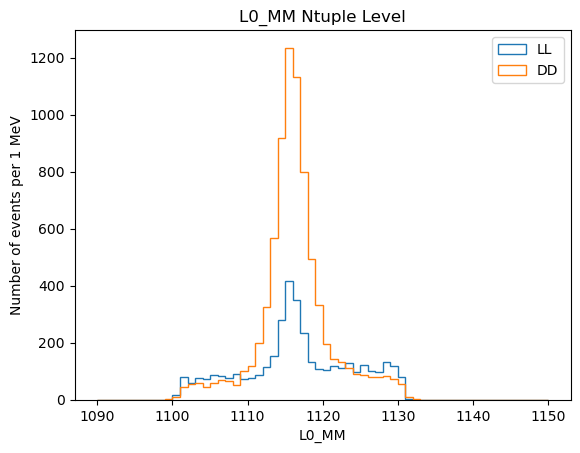

In [16]:
## Plot a histogram of LL and DD Mass distributions
fig, ax = plt.subplots()
ax.hist(L0_MM[LL], bins=60, range=(1090,1150), histtype='step', label='LL')
ax.hist(L0_MM[DD], bins=60, range=(1090,1150), histtype='step', label='DD')
ax.set_xlabel('L0_MM')
ax.set_ylabel('Number of events per 1 MeV')
ax.title.set_text('L0_MM Ntuple Level')
ax.legend()
plt.show()


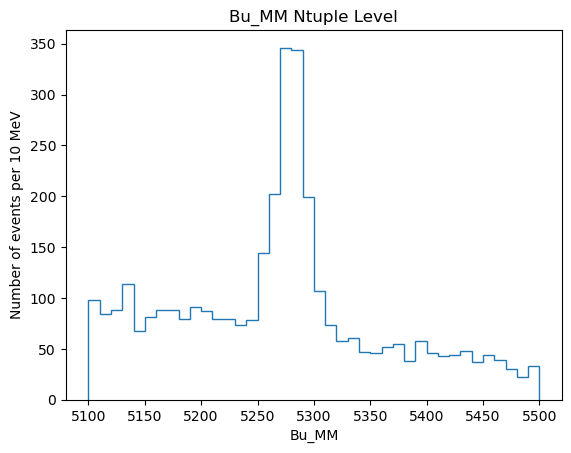

In [17]:
# Plot the Bu_MM distribution at the ntuple level
fig, ax = plt.subplots()
ax.hist(Bu_MM, bins=40, range=(5100,5500), histtype='step')
ax.set_xlabel('Bu_MM')
ax.set_ylabel('Number of events per 10 MeV')
ax.title.set_text('Bu_MM Ntuple Level')
plt.show()


## Explore cut variables

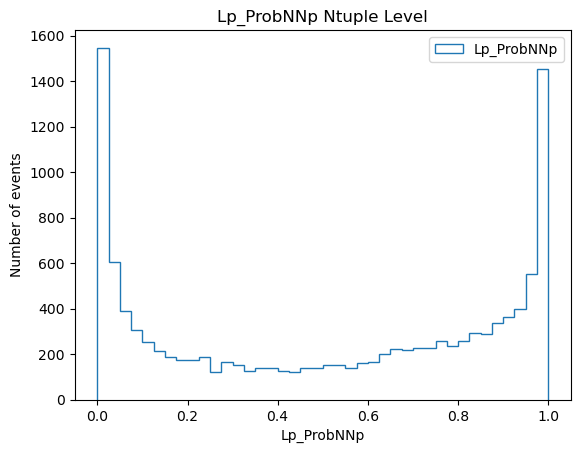

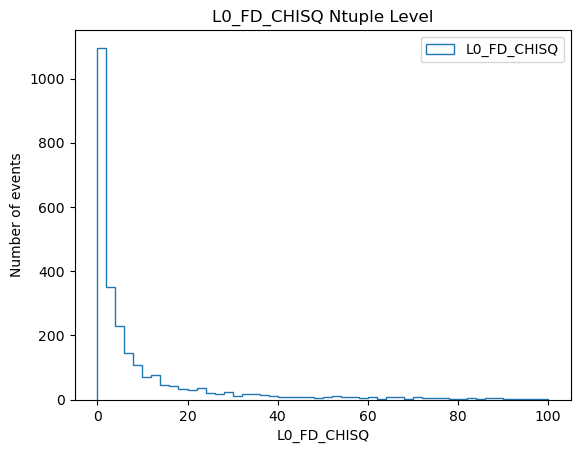

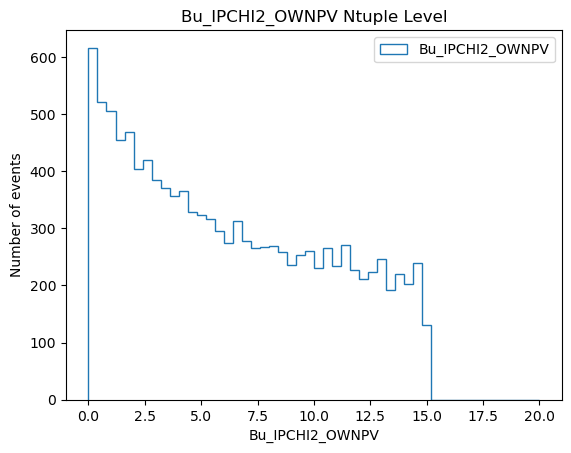

In [18]:
## Plot a histogram of the cut variables (Lp_probNNp)
fig, ax = plt.subplots()
ax.hist(Lp_ProbNNp, bins=40, range=(0,1), histtype='step', label='Lp_ProbNNp')
ax.set_xlabel('Lp_ProbNNp')
ax.set_ylabel('Number of events')
ax.title.set_text('Lp_ProbNNp Ntuple Level')
ax.legend()

## Plot a histogram of the cut variables (L0_FD_CHISQ)
fig, ax = plt.subplots()
ax.hist(L0_FD_CHISQ, bins=50, range=(0,100), histtype='step', label='L0_FD_CHISQ')
ax.set_xlabel('L0_FD_CHISQ')
ax.set_ylabel('Number of events')
ax.title.set_text('L0_FD_CHISQ Ntuple Level')
ax.legend()

## Plot a histogram of the cut variables (Bu_IPCHI2_OWNPV)
fig, ax = plt.subplots()
ax.hist(Bu_IPCHI2_OWNPV, bins=50, range=(0,20), histtype='step', label='Bu_IPCHI2_OWNPV')
ax.set_xlabel('Bu_IPCHI2_OWNPV')
ax.set_ylabel('Number of events')
ax.title.set_text('Bu_IPCHI2_OWNPV Ntuple Level')
ax.legend()


# B Fitting

First lets try to get a good B+ sample. we will try the following cuts

- p_ProbNNp
- good_Lambda
- prodProbKK > 0.2
- B_region

In [19]:

good_b = good_Lambda & (prodProbKK > 0.4) & (p_ProbNNp > 0.5)  & B_region
good_cand = good_Lambda & (prodProbKK > 0.4) & (p_ProbNNp > 0.5)
better_b = good_b & (Bu_IPCHI2_OWNPV < 5)
# add mass cut that Bu_MM is between 5200 and 5400
good_b_mass = Bu_MM[good_b]


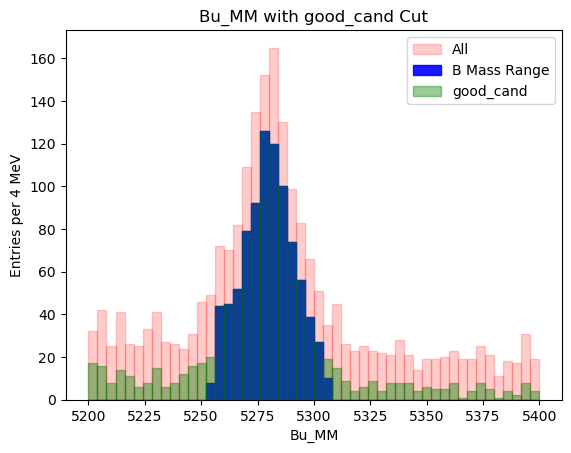

In [20]:
# Now lets plot the Bu_Mass for good_b

plt.figure()
plt.hist(Bu_MM, bins=50, range=(5200, 5400), facecolor='r', edgecolor='r', alpha=0.2, label='All')
plt.hist(good_b_mass, bins=50, range=(5200, 5400), facecolor='b', edgecolor='b', alpha=0.9, label='B Mass Range')
plt.hist(Bu_MM[good_cand], bins=50, range=(5200, 5400), facecolor='g', edgecolor='g', alpha=0.4, label='good_cand')
plt.xlabel('Bu_MM')
plt.ylabel('Entries per 4 MeV')
plt.title('Bu_MM with good_cand Cut')
plt.legend()
plt.show()


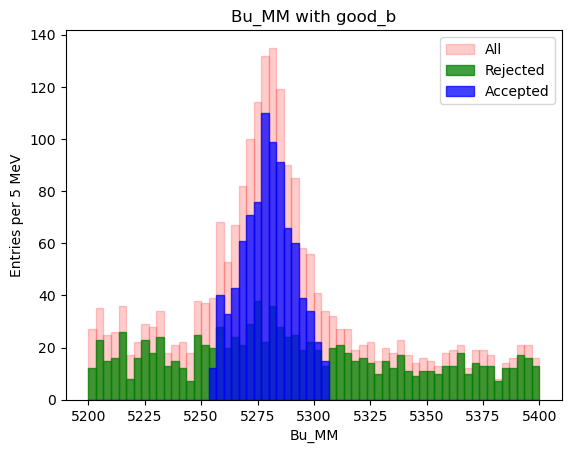

In [21]:
# Now lets plot the Bu_Mass for good_b

rejected = np.logical_not(good_cand)
plt.figure()
plt.hist(Bu_MM, bins=60, range=(5200, 5400), facecolor='r', edgecolor='r', alpha=0.2, label='All')
plt.hist(Bu_MM[rejected], bins=60, range=(5200, 5400), facecolor='g', edgecolor='g', alpha=0.75, label='Rejected')
plt.hist(Bu_MM[good_b], bins=60, range=(5200, 5400), facecolor='b', edgecolor='b', alpha=0.75, label='Accepted')
plt.xlabel('Bu_MM')
plt.ylabel('Entries per 5 MeV')
plt.title('Bu_MM with good_b')
plt.legend()
plt.show()


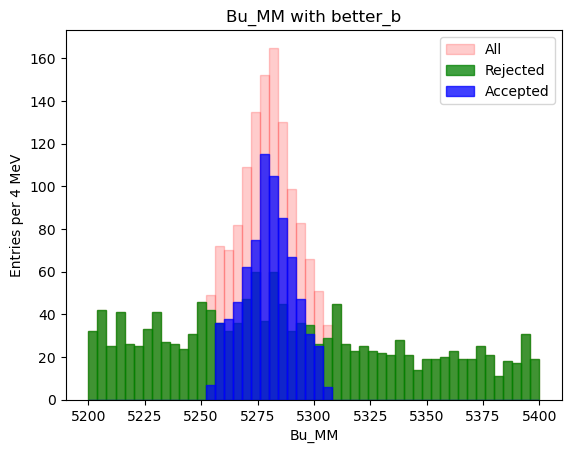

In [22]:
# Now lets plot the Bu_Mass for good_b

rejected = np.logical_not(better_b)
plt.figure()
plt.hist(Bu_MM, bins=50, range=(5200, 5400), facecolor='r', edgecolor='r', alpha=0.2, label='All')
plt.hist(Bu_MM[rejected], bins=50, range=(5200, 5400), facecolor='g', edgecolor='g', alpha=0.75, label='Rejected')
plt.hist(Bu_MM[better_b], bins=50, range=(5200, 5400), facecolor='b', edgecolor='b', alpha=0.75, label='Accepted')
plt.xlabel('Bu_MM')
plt.ylabel('Entries per 4 MeV')
plt.title('Bu_MM with better_b')
plt.legend()
plt.show()


## Invariant Masses

First, lets define the four momentums for our decay produces. we have different combinantions. the following table put a summary for that

| Combination        | Possible Resonance       
| ------------- |:-------------:| 
| K₁⁺ K₂⁺     |None
| Λ₋p      | Nucleon Resonances     
| Λ₋K₁⁺ | Hyperon Resonances     
| Λ₋K₂⁺ | Hyperon Resonances      
| pK₁⁺ | Hyperon Resonances     
| pK₂⁺ | Hyperon Resonances      
| Λ₋pK₁⁺ | Baryon Resonances      
| Λ₋pK₂⁺ | Baryon Resonances      
| pK₁⁺K₂⁺ | Baryon Resonances      
| Λ₋K₁⁺K₂⁺ | Baryon Resonances

In [23]:
K1_4vec  = vector.awk({"x":h1_PX, "y":h1_PY, "z":h1_PZ, "t":h1_PE}) # K+
K2_4vec  = vector.awk({"x":h2_PX, "y":h2_PY, "z":h2_PZ, "t":h2_PE}) # K+
p_4vec   = vector.awk({"x":p_PX,  "y":p_PY,  "z":p_PZ,  "t":p_PE}) # p
L0_4vec  = vector.awk({"x":L0_PX,  "y":L0_PY,  "z":L0_PZ,  "t":L0_PE}) # L0

KK_4vec  = K1_4vec+K2_4vec
pKK_4vec = p_4vec+KK_4vec 

LbarpKp_4vec = L0_4vec + p_4vec + K2_4vec

KK_mass  = np.sqrt(np.square(KK_4vec.t)  - np.square(KK_4vec.x)  - np.square(KK_4vec.y)  - np.square(KK_4vec.z))

pKK_mass = np.sqrt(np.square(pKK_4vec.t) - np.square(pKK_4vec.x) - np.square(pKK_4vec.y) - np.square(pKK_4vec.z))

LbarpKp_mass = np.sqrt(np.square(LbarpKp_4vec.t) - np.square(LbarpKp_4vec.x) - np.square(LbarpKp_4vec.y) - np.square(LbarpKp_4vec.z))

### p_bar K+

In [24]:
# define a four momentum for p K+ system (First K+)

pKp1_4vec = p_4vec + K1_4vec
pKp1_mass = np.sqrt(np.square(pKp1_4vec.t) - np.square(pKp1_4vec.x) - np.square(pKp1_4vec.y) - np.square(pKp1_4vec.z))


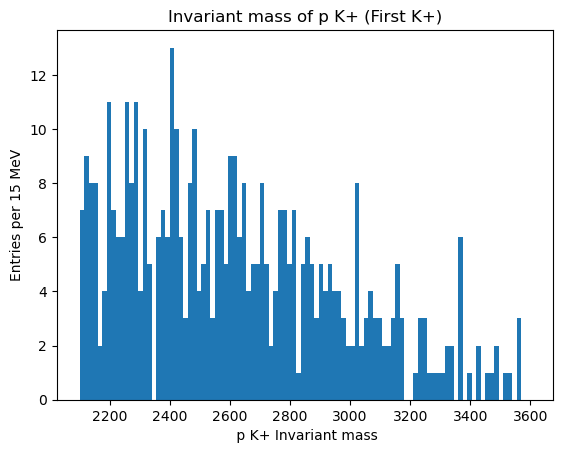

In [25]:
# plt the p K+ invaarint mass histogram (First K+)

plt.figure()
plt.hist(pKp1_mass[good_b], bins=100, range=(2100, 3600))
plt.title(r"Invariant mass of p K+ (First K+)")
plt.xlabel(r" p K+ Invariant mass")
plt.ylabel("Entries per 15 MeV")
plt.show()



### Λ p K⁺

In [26]:
# Now lets add the Λ₋pK₁⁺ system and define a four momentum for it (First K+)
LbarpKp1_4vec = L0_4vec + p_4vec + K1_4vec
LbarpKp1_mass = np.sqrt(np.square(LbarpKp1_4vec.t) - np.square(LbarpKp1_4vec.x) - np.square(LbarpKp1_4vec.y) - np.square(LbarpKp1_4vec.z))



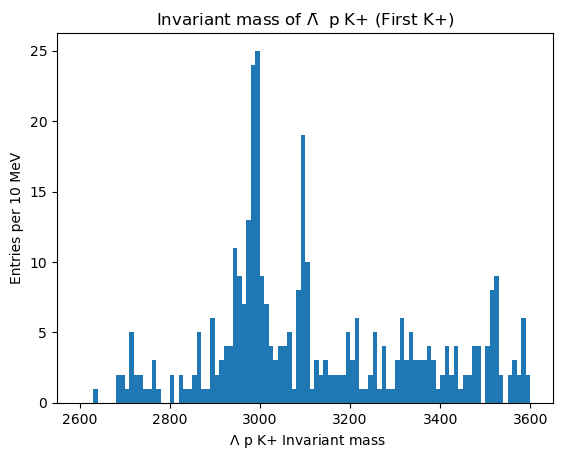

In [27]:
plt.figure()
plt.hist(LbarpKp1_mass[good_b], bins=100, range=(2600, 3600))
plt.title(r"Invariant mass of $\Lambda$̄  p K+ (First K+)")
plt.xlabel(r" $\Lambda$ p K+ Invariant mass")
plt.ylabel("Entries per 10 MeV")
plt.show()


In [28]:
# Now lets add the Λ₋pK₁⁺ system and define a four momentum for it (Second K+)
LbarpKp2_4vec = L0_4vec + p_4vec + K2_4vec
LbarpKp2_mass = np.sqrt(np.square(LbarpKp2_4vec.t) - np.square(LbarpKp2_4vec.x) - np.square(LbarpKp2_4vec.y) - np.square(LbarpKp2_4vec.z))

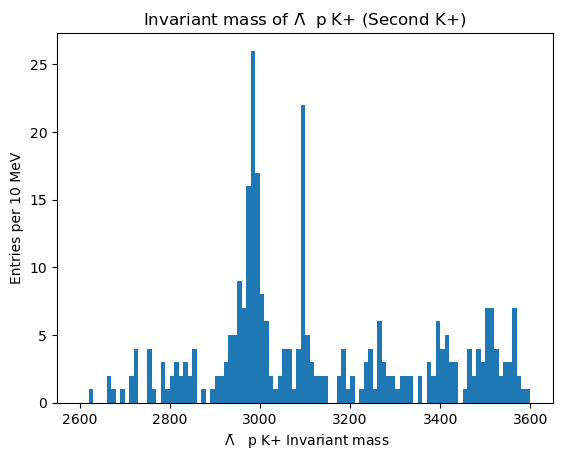

In [29]:
plt.figure()
plt.hist(LbarpKp2_mass[good_b], bins=100, range=(2600, 3600))
plt.title(r"Invariant mass of $\Lambda$̄  p K+ (Second K+)")
plt.xlabel(r" $\Lambda$̄   p K+ Invariant mass")
plt.ylabel("Entries per 10 MeV")
plt.show()


In [30]:
B_region = (Bu_MM>5255.) & (Bu_MM<5305.)
prodProb_ppbar = np.multiply(p_ProbNNp,Lp_ProbNNp)
good_candLL     = good_LambdaLL & (prodProbKK>0.5) & (prodProb_ppbar>0.2)
good_candDD     = good_LambdaDD & (prodProbKK>0.5) & (prodProb_ppbar>0.2)
good_cand       = good_Lambda   & (prodProbKK>0.5) & (prodProb_ppbar>0.2)

better_cand   = good_cand & (Bu_IPCHI2_OWNPV<6) 
better_candLL = good_candLL & (Bu_IPCHI2_OWNPV<6)
better_candDD = good_candDD & (Bu_IPCHI2_OWNPV<6)

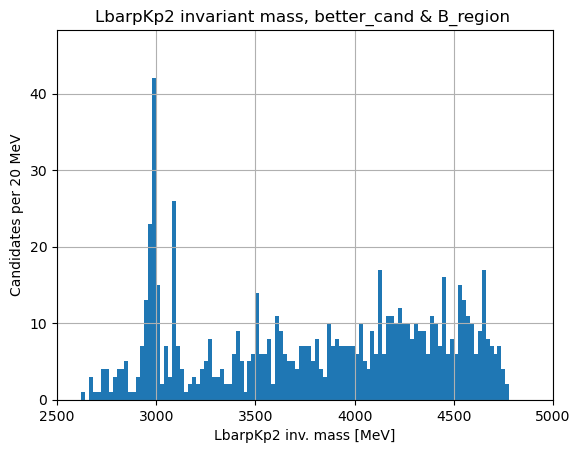

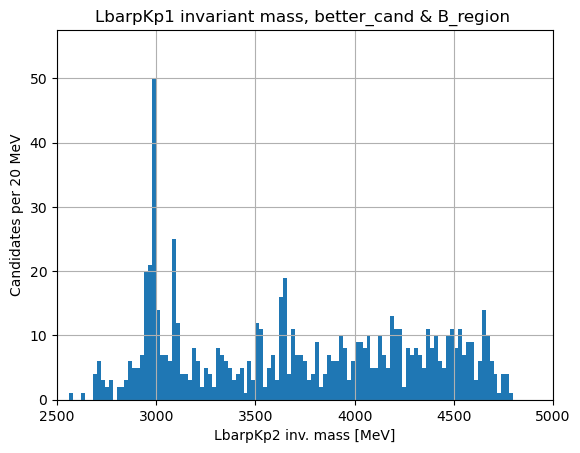

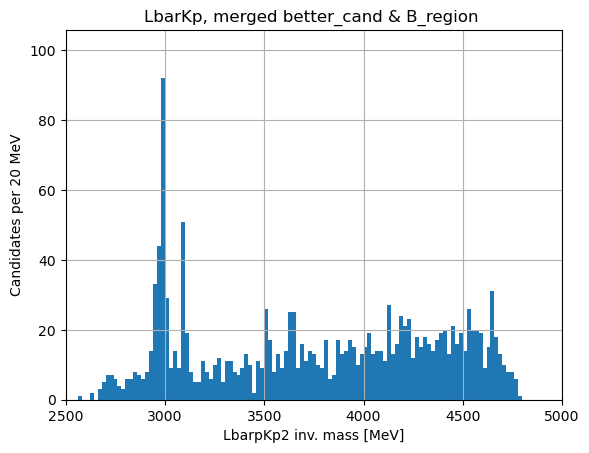

In [31]:
plt.figure()
plt.title('LbarpKp2 invariant mass, better_cand & B_region ')
nC, bins, patches = plt.hist(LbarpKp2_mass[better_cand & B_region], bins=125, range=(2500,5000))
plt.xlabel(r'LbarpKp2 inv. mass [MeV]')
plt.ylabel('Candidates per 20 MeV')
plt.axis([2500,5000,0,1.15*max(nC)])
plt.grid(True)
plt.show()


plt.figure()
plt.title('LbarpKp1 invariant mass, better_cand & B_region ')
nC, bins, patches = plt.hist(LbarpKp1_mass[better_cand & B_region], bins=125, range=(2500,5000))
plt.xlabel(r'LbarpKp2 inv. mass [MeV]')
plt.ylabel('Candidates per 20 MeV')
plt.axis([2500,5000,0,1.15*max(nC)])
plt.grid(True)
plt.show()

LbarpKp2_mass_goodB = np.asarray(LbarpKp2_mass[better_cand & B_region])
LbarpKp1_mass_goodB = np.asarray(LbarpKp1_mass[better_cand & B_region])
LbarKp_mass_goodB   = np.concatenate([LbarpKp2_mass_goodB,LbarpKp1_mass_goodB])


plt.figure()
plt.title('LbarKp, merged better_cand & B_region ')
nC, bins, patches = plt.hist(LbarKp_mass_goodB, bins=125, range=(2500,5000))
plt.xlabel(r'LbarpKp2 inv. mass [MeV]')
plt.ylabel('Candidates per 20 MeV')
plt.axis([2500,5000,0,1.15*max(nC)])
plt.grid(True)
plt.show()


In [32]:
notD_or_phi = ((KK_mass<1850) | (KK_mass>1880)) & (KK_mass>1030)

In [35]:
good_pProbNNp = (p_ProbNNp>0.5)
bad_pProbNNp  = (p_ProbNNp<0.5)

good_prodProbKK = (prodProbKK>0.5)
good_probNNx = good_pProbNNp & good_prodProbKK

In [36]:
good_prodProbKK = (prodProbKK>0.5)
good_probNNx = good_pProbNNp & good_prodProbKK

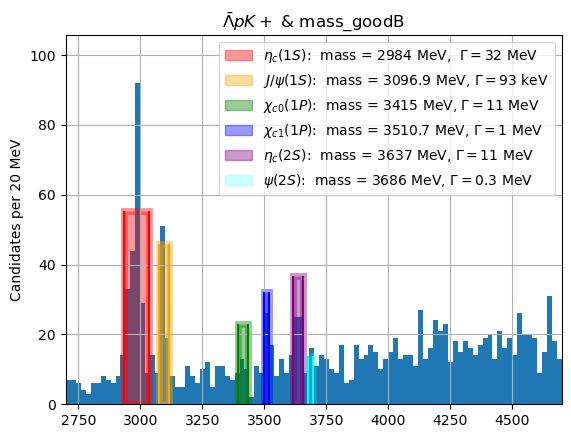

In [37]:
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches

plt.figure()
plt.title(r'$\bar{\Lambda} p K+$ & mass_goodB')
nC, bins, patches = plt.hist(LbarKp_mass_goodB, bins=110, range=(2600,4800))
plt.ylabel('Candidates per 20 MeV')
plt.axis([2700.,4700.,0,1.15*max(nC)])
plt.grid(True)

colors = ['red', 'orange', 'green', 'blue', 'purple', 'cyan']

plt.vlines(2934., 0., 0.6*max(nC), colors=colors[0])
plt.vlines(3034., 0., 0.6*max(nC), colors=colors[0])
plt.gca().add_patch(Rectangle((2934, 0), 100, 0.6*max(nC), edgecolor = colors[0], facecolor = colors[0], fill=True, lw=5, alpha=0.40))

plt.vlines(3077, 0., 0.5*max(nC), colors=colors[1])
plt.vlines(3117, 0., 0.5*max(nC), colors=colors[1])
plt.gca().add_patch(Rectangle((3077, 0), 40, 0.5*max(nC), edgecolor = colors[1], facecolor = colors[1], fill=True, lw=5, alpha=0.40))

plt.vlines(3395., 0., 0.25*max(nC), colors=colors[2])
plt.vlines(3435., 0., 0.25*max(nC), colors=colors[2])
plt.gca().add_patch(Rectangle((3395., 0), 40, 0.25*max(nC), edgecolor = colors[2], facecolor = colors[2], fill=True, lw=5, alpha=0.40))

plt.vlines(3500.7, 0., 0.35*max(nC), colors=colors[3])
plt.vlines(3520.7, 0., 0.35*max(nC), colors=colors[3])
plt.gca().add_patch(Rectangle((3500.7, 0), 20, 0.35*max(nC), edgecolor = colors[3], facecolor = colors[3], fill=True, lw=5, alpha=0.40))

plt.vlines(3617, 0., 0.40*max(nC), colors=colors[4])
plt.vlines(3657, 0., 0.40*max(nC), colors=colors[4])
plt.gca().add_patch(Rectangle((3617, 0), 40, 0.40*max(nC), edgecolor = colors[4], facecolor = colors[4], fill=True, lw=5, alpha=0.40))

plt.vlines(3676, 0., 0.15*max(nC), colors=colors[5])
plt.vlines(3696, 0., 0.15*max(nC), colors=colors[5])
plt.gca().add_patch(Rectangle((3676, 0), 20, 0.15*max(nC), edgecolor = colors[5], facecolor = colors[5], fill=True, lw=5, alpha=0.20))

patches_legend = [mpatches.Patch(color=color, alpha=0.40 if i != 5 else 0.20, label=label) for i, (color, label) in enumerate(zip(colors, [
    r'$ \eta_c (1S) $:  mass = 2984 MeV,  $ \Gamma = 32 $ MeV',
    r'$ J/\psi (1S) $:  mass = 3096.9 MeV, $ \Gamma = 93 $ keV',
    r'$ \chi_{c0} (1P) $:  mass = 3415 MeV, $ \Gamma = 11 $ MeV',
    r'$ \chi_{c1} (1P) $:  mass = 3510.7 MeV, $ \Gamma = 1 $ MeV',
    r'$ \eta_c (2S) $:  mass = 3637 MeV, $ \Gamma = 11 $ MeV',
    r'$ \psi(2S) $:  mass = 3686 MeV, $ \Gamma = 0.3 $ MeV']))]

plt.legend(handles=patches_legend, loc='upper right')

plt.show()


In [38]:
etaC1S_range = ((LbarpKp1_mass>2934.) & (LbarpKp1_mass<3034.)) | ((LbarpKp2_mass>2934.) & (LbarpKp2_mass<3034.))
etaC1S       = better_cand & etaC1S_range

Jpsi_range = ((LbarpKp1_mass>3077.) & (LbarpKp1_mass<3127.)) | ((LbarpKp2_mass>3077.) & (LbarpKp2_mass<3127.))
Jpsi       = better_cand & Jpsi_range

chiC01P_range = ((LbarpKp1_mass>3395.) & (LbarpKp1_mass<3435.)) | ((LbarpKp2_mass>3395.) & (LbarpKp2_mass<3435.))
chiC01P       = better_cand & chiC01P_range

chiC11P_range = ((LbarpKp1_mass>3500.7) & (LbarpKp1_mass<3520.7)) | ((LbarpKp2_mass>3500.7) & (LbarpKp2_mass<3520.7))
chiC11P       = better_cand & chiC01P_range

etaC2S_range = ((LbarpKp1_mass>3617.) & (LbarpKp1_mass<3657.)) | ((LbarpKp2_mass>3617.) & (LbarpKp2_mass<3657.))
etaC2S       = better_cand & chiC01P_range

charmonium  = etaC1S  | Jpsi | chiC01P | chiC11P | etaC2S 

not_charmonium = np.logical_and(better_cand,np.logical_not(charmonium))

In [39]:
pKm_4vec = p_4vec + K2_4vec
pKm_mass = np.sqrt(np.square(pKm_4vec.t) - np.square(pKm_4vec.x) - np.square(pKm_4vec.y) - np.square(pKm_4vec.z))

pKp_4vec = p_4vec + K1_4vec
pKp_mass = np.sqrt(np.square(pKp_4vec.t) - np.square(pKp_4vec.x) - np.square(pKp_4vec.y) - np.square(pKp_4vec.z))

Lbarp_4vec = L0_4vec + p_4vec
Lbarp_mass = np.sqrt(np.square(Lbarp_4vec.t) - np.square(Lbarp_4vec.x) - np.square(Lbarp_4vec.y) - np.square(Lbarp_4vec.z))

LbarKm_4vec = L0_4vec + K1_4vec
LbarKm_mass = np.sqrt(np.square(LbarKm_4vec.t) - np.square(LbarKm_4vec.x) - np.square(LbarKm_4vec.y) - np.square(LbarKm_4vec.z))

LbarKp_4vec = L0_4vec + K2_4vec
LbarKp_mass = np.sqrt(np.square(LbarKp_4vec.t) - np.square(LbarKp_4vec.x) - np.square(LbarKp_4vec.y) - np.square(LbarKp_4vec.z))

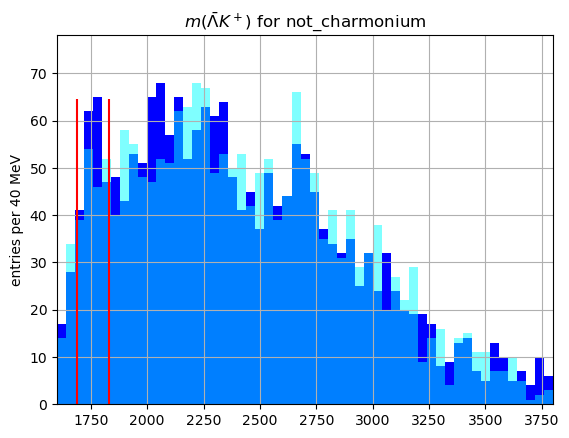

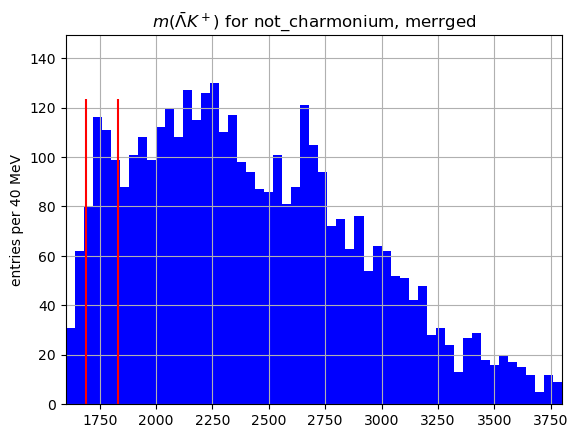

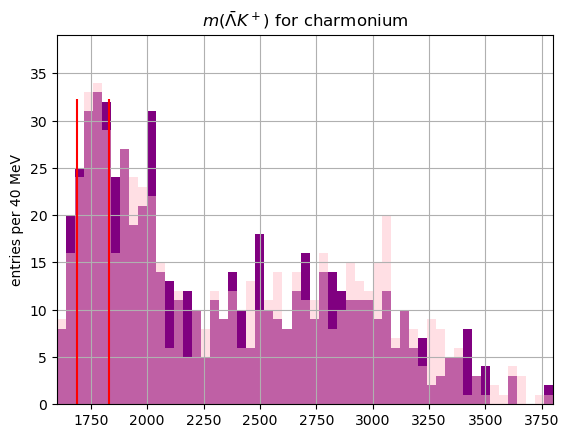

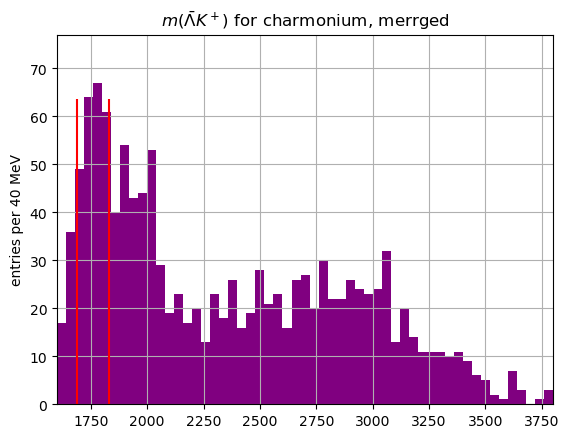

In [40]:
plt.figure()
plt.title(r'$ m(\bar{\Lambda} K^+ ) $ for not_charmonium')
nC, bins, patches = plt.hist(LbarKm_mass[not_charmonium], bins=55, range=(1600,3800), color='b')
nC, bins, patches = plt.hist(LbarKp_mass[not_charmonium], bins=55, range=(1600,3800), color='cyan', alpha=0.50)
plt.vlines(1690, 0., 0.95*max(nC), colors='r')
plt.vlines(1830, 0., 0.95*max(nC), colors='r')
plt.ylabel('entries per 40 MeV')
plt.axis([1600,3800,0,1.15*max(nC)])
plt.grid(True)
plt.show()

LKp1__not_charmonium = LbarKm_mass[not_charmonium]
LKp2__not_charmonium = LbarKp_mass[not_charmonium]
LKp_not_charmonium = np.concatenate([LKp1__not_charmonium,LKp2__not_charmonium])
plt.figure()
plt.title(r'$ m(\bar{\Lambda} K^+ ) $ for not_charmonium, merrged')
nC, bins, patches = plt.hist(LKp_not_charmonium , bins=55, range=(1600,3800), color='b')
plt.vlines(1690, 0., 0.95*max(nC), colors='r')
plt.vlines(1830, 0., 0.95*max(nC), colors='r')
plt.ylabel('entries per 40 MeV')
plt.axis([1600,3800,0,1.15*max(nC)])
plt.grid(True)
plt.show()


plt.figure()
plt.title(r'$ m(\bar{\Lambda} K^+ ) $ for charmonium')
nC, bins, patches = plt.hist(LbarKm_mass[charmonium], bins=55, range=(1600,3800), color='purple')
nC, bins, patches = plt.hist(LbarKp_mass[charmonium], bins=55, range=(1600,3800), color='pink', alpha=0.50)
plt.vlines(1690, 0., 0.95*max(nC), colors='r')
plt.vlines(1830, 0., 0.95*max(nC), colors='r')
plt.ylabel('entries per 40 MeV')
plt.axis([1600,3800,0,1.15*max(nC)])
plt.grid(True)

plt.show()

LKp1__charmonium = LbarKm_mass[charmonium]
LKp2__charmonium = LbarKp_mass[charmonium]
LKp_charmonium = np.concatenate([LKp1__charmonium,LKp2__charmonium])
plt.figure()
plt.title(r'$ m(\bar{\Lambda} K^+ ) $ for charmonium, merrged')
nC, bins, patches = plt.hist(LKp_charmonium , bins=55, range=(1600,3800), color='purple')
plt.vlines(1690, 0., 0.95*max(nC), colors='r')
plt.vlines(1830, 0., 0.95*max(nC), colors='r')
plt.ylabel('entries per 40 MeV')
plt.axis([1600,3800,0,1.15*max(nC)])
plt.grid(True)
plt.show()


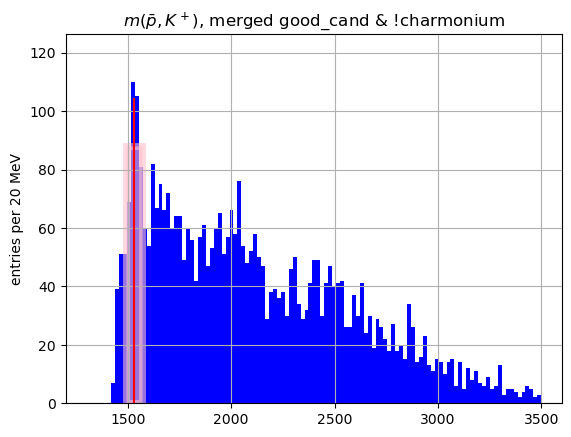

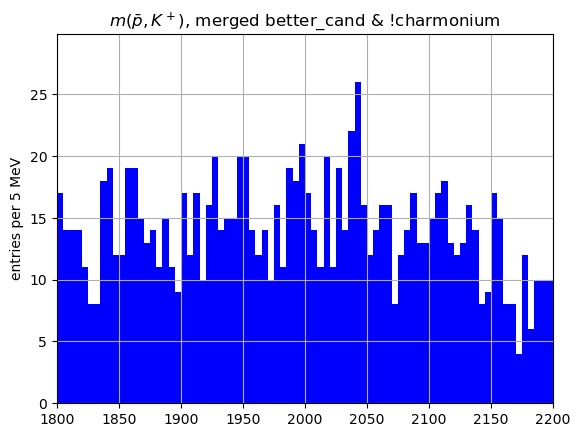

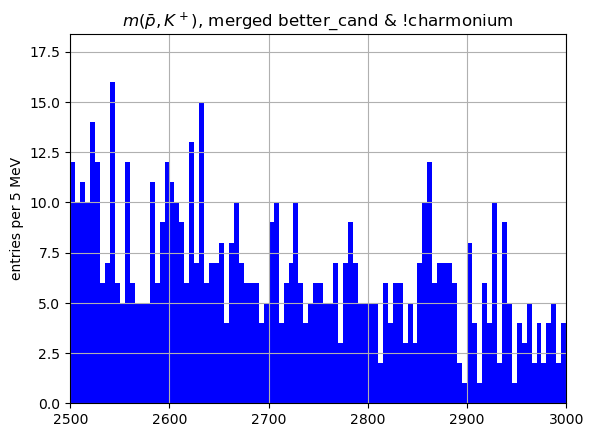

In [41]:



pbarKp2_mass_not_charmonium = pKm_mass[not_charmonium]
pbarKp1_mass_not_charmonium = pKp_mass[not_charmonium]
pbarKp_mass_not_charmonium  = np.concatenate([pbarKp1_mass_not_charmonium,pbarKp2_mass_not_charmonium])
plt.figure()
plt.title(r'$ m(\bar p,K^+) $, merged good_cand & !charmonium')
nC, bins, patches = plt.hist(pbarKp_mass_not_charmonium, bins=110, range=(1400.,3500.), color='b')
plt.vlines(1530, 0., 0.95*max(nC), colors='r')
##plt.vlines(1830, 0., 0.95*max(nC), colors='r')
##plt.vlines(3250, 0., 0.95*max(nC), colors='g')
##plt.vlines(3400, 0., 0.95*max(nC), colors='g')
plt.gca().add_patch(Rectangle((1490, 0), 80, 0.80*max(nC),
             edgecolor = 'pink',
             facecolor = 'pink',
             fill=True,
             lw=5,
              alpha=0.60))

plt.ylabel('entries per 20 MeV')
plt.axis([1200.,3600.,0,1.15*max(nC)])
plt.grid(True)
plt.show()

plt.title(r'$ m(\bar p,K^+) $, merged better_cand & !charmonium')
nC, bins, patches = plt.hist(pbarKp_mass_not_charmonium, bins=80, range=(1800.,2200.), color='b')
plt.vlines(1530, 0., 0.95*max(nC), colors='r')
plt.ylabel('entries per 5 MeV')
plt.axis([1800.,2200.,0,1.15*max(nC)])
plt.grid(True)
plt.show()

plt.title(r'$ m(\bar p,K^+) $, merged better_cand & !charmonium')
nC, bins, patches = plt.hist(pbarKp_mass_not_charmonium, bins=100, range=(2500.,3000.), color='b')
plt.vlines(1530, 0., 0.95*max(nC), colors='r')
plt.ylabel('entries per 5 MeV')
plt.axis([2500.,3000.,0,1.15*max(nC)])
plt.grid(True)
plt.show()




In [43]:
D_region = (KK_mass > 1850) & (KK_mass < 1880)
phi_region = (KK_mass > 1010) & (KK_mass < 1030)


In [44]:
etaC1S  = good_Lambda & (prodProbKK>0.5) & notD_or_phi & (LbarpKp_mass>2934.) & (LbarpKp_mass<3034.)
Jpsi    = good_Lambda & (prodProbKK>0.5) & notD_or_phi & (LbarpKp_mass>3077.) & (LbarpKp_mass<3127.)
chiC01P = good_Lambda & (prodProbKK>0.5) & notD_or_phi & (LbarpKp_mass>3395.) & (LbarpKp_mass<3435.)
chiC11P = good_Lambda & (prodProbKK>0.5) & notD_or_phi & (LbarpKp_mass>3500.7) & (LbarpKp_mass<3520.7)
etaC2S  = good_Lambda & (prodProbKK>0.5) & notD_or_phi & (LbarpKp_mass>3617.) & (LbarpKp_mass<3657.)
charmonium  = etaC1S  | Jpsi | chiC01P | chiC11P | etaC2S 
not_etaC1S  = (LbarpKp_mass<2934.) | (LbarpKp_mass>3034.)
not_Jpsi    = (LbarpKp_mass<3077.) | (LbarpKp_mass>3127.)
not_chiC01P = (LbarpKp_mass<3395.) | (LbarpKp_mass>3435.)
not_chiC11P = (LbarpKp_mass<3500.7) | (LbarpKp_mass>3520.7)
not_etaC2S  = (LbarpKp_mass<3617.) | (LbarpKp_mass>3657.)
not_charmonium = good_Lambda & (prodProbKK>0.5) & not_etaC1S & not_Jpsi & not_chiC01P & not_chiC11P & not_etaC2S
not_D          = np.logical_not(D_region)
not_phi        = np.logical_not(phi_region)
not_KK         = not_D & not_phi
good_D         = good_Lambda & (prodProbKK>0.5) & D_region
good_phi       = good_Lambda & (prodProbKK>0.5) & phi_region

In [45]:
L1530   = (pKp_mass>1490.) & (pKp_mass<1570.)
L1530_not_charmonium = L1530 & not_charmonium
L1530ex = L1530 & not_KK & not_charmonium
L1530_charmonium = L1530 & charmonium

In [46]:
good_B_not_KK_or_charmonium = better_Lambda & good_probNNx & not_KK & not_charmonium & B_region

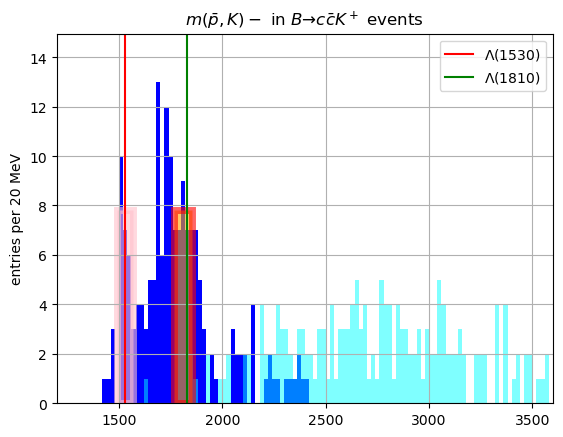

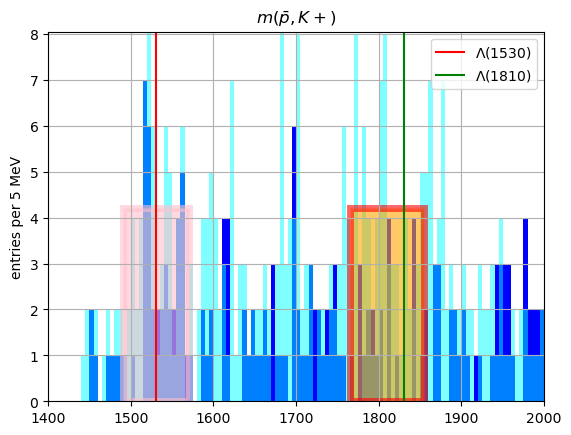

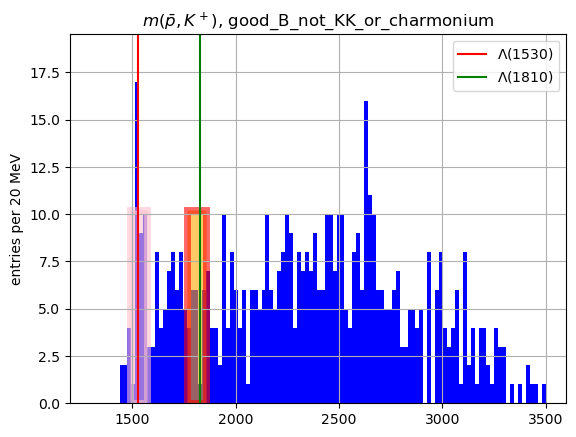

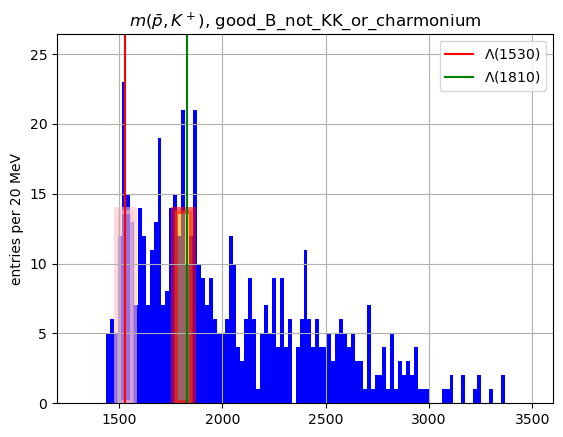

In [47]:
plt.figure()
nC, bins, patches = plt.hist(pKm_mass[better_Lambda & good_probNNx & B_region & charmonium], bins=120, range=(1200.,3600.), color='b')
plt.hist(pKp_mass[better_Lambda & good_probNNx & B_region & charmonium], bins=120, range=(1200.,3600.), color='cyan', alpha=0.50)
plt.title(r'$ m(\bar{p},K ) - $ in $ B \to c \bar c K^+ $ events ' )
plt.axvline(x=1530, ymin=0., ymax=0.95*max(nC), color='r', label=r'$\Lambda(1530)$')
plt.axvline(x=1830, ymin=0., ymax=0.95*max(nC), color='g', label=r'$\Lambda(1810)$')
plt.gca().add_patch(Rectangle((1490, 0), 80, 0.6*max(nC), edgecolor='pink', facecolor='pink', fill=True, lw=5, alpha=0.60))
plt.gca().add_patch(Rectangle((1765, 0), 90, 0.6*max(nC), edgecolor='red', facecolor='orange', fill=True, lw=5, alpha=0.60))
plt.ylabel('entries per 20 MeV')
plt.axis([1200.,3600.,0,1.15*max(nC)])
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
nC, bins, patches = plt.hist(pKm_mass[good_B_not_KK_or_charmonium], bins=120, range=(1400.,2000.), color='b')
plt.hist(pKp_mass[good_B_not_KK_or_charmonium], bins=120, range=(1400.,2000.), color='cyan', alpha=0.50)
plt.title(r'$ m(\bar{p},K+ )$' )
plt.axvline(x=1530, ymin=0., ymax=0.95*max(nC), color='r', label=r'$\Lambda(1530)$')
plt.axvline(x=1830, ymin=0., ymax=0.95*max(nC), color='g', label=r'$\Lambda(1810)$')
plt.gca().add_patch(Rectangle((1490, 0), 80, 0.6*max(nC), edgecolor='pink', facecolor='pink', fill=True, lw=5, alpha=0.60))
plt.gca().add_patch(Rectangle((1765, 0), 90, 0.6*max(nC), edgecolor='red', facecolor='orange', fill=True, lw=5, alpha=0.60))
plt.ylabel('entries per 5 MeV')
plt.axis([1400.,2000.,0,1.15*max(nC)])
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.title(r'$ m(\bar{p},K^+) $, good_B_not_KK_or_charmonium')
nC, bins, patches = plt.hist(pKm_mass[good_B_not_KK_or_charmonium], bins=110, range=(1400.,3500.), color='b')
plt.axvline(x=1530, ymin=0., ymax=0.95*max(nC), color='r', label=r'$\Lambda(1530)$')
plt.axvline(x=1830, ymin=0., ymax=0.95*max(nC), color='g', label=r'$\Lambda(1810)$')
plt.gca().add_patch(Rectangle((1490, 0), 80, 0.6*max(nC), edgecolor='pink', facecolor='pink', fill=True, lw=5, alpha=0.60))
plt.gca().add_patch(Rectangle((1765, 0), 90, 0.6*max(nC), edgecolor='red', facecolor='orange', fill=True, lw=5, alpha=0.60))
plt.ylabel('entries per 20 MeV')
plt.axis([1200.,3600.,0,1.15*max(nC)])
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.title(r'$ m(\bar{p},K^+) $, good_B_not_KK_or_charmonium')
nC, bins, patches = plt.hist(pKp_mass[good_B_not_KK_or_charmonium], bins=110, range=(1400.,3500.), color='b')
plt.axvline(x=1530, ymin=0., ymax=0.95*max(nC), color='r', label=r'$\Lambda(1530)$')
plt.axvline(x=1830, ymin=0., ymax=0.95*max(nC), color='g', label=r'$\Lambda(1810)$')
plt.gca().add_patch(Rectangle((1490, 0), 80, 0.6*max(nC), edgecolor='pink', facecolor='pink', fill=True, lw=5, alpha=0.60))
plt.gca().add_patch(Rectangle((1765, 0), 90, 0.6*max(nC), edgecolor='red', facecolor='orange', fill=True, lw=5, alpha=0.60))
plt.ylabel('entries per 20 MeV')
plt.axis([1200.,3600.,0,1.15*max(nC)])
plt.legend()
plt.grid(True)
plt.show()
